### Simple Linear Regression using numpy (with pandas and pyplot)

In the following, we'll take a closer look at the relationships between following variables:
- temperature (y) versus latitude (x)
- temperature (y) versus longitude (x)

![title](images/latitude_longitude.jpg)

In [25]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
# For compatibility across multiple platforms
import os
IB = os.environ.get('INSTABASE_URI',None) is not None
open = ib.open if IB else open

### Reading CSV file into dataframe
Let's begin by reading Cities.csv into a dataframe.

In [27]:
f = open('datasets/Cities.csv','r')
cities = pd.read_csv(f)

### Plotting a line
Suppose we want to plot a line that passes through points (1,2) and (3,7). 

The way to do this would be as follows:

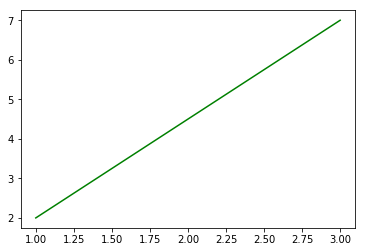

In [28]:
plt.plot([1,3], [2,7], color='green')
plt.show()

### Temperature versus latitude scatterplot
A <b>scatterplot</b> is a type of plot that displays values for typically two variables for a set of data. 

In the following plot, each point represents a <b>city</b> with its corresponding <b>latitude</b> (x) and <b>temperature</b> (y) values.

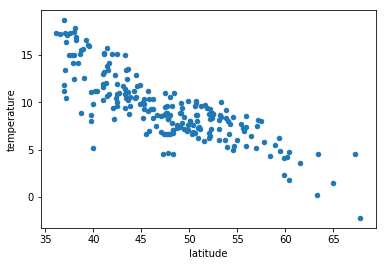

In [29]:
cities.plot.scatter(x='latitude', y='temperature')
plt.show()

### Add linear regression
We want to calculate a simple <b>linear regression line</b> that <b>passes through the data</b> such that the distance of each data point from the line is minimized. 

Luckily, the Numpy package comes with a function called <b>ployfit()</b> that automatically calculates the linear regression model for us. 

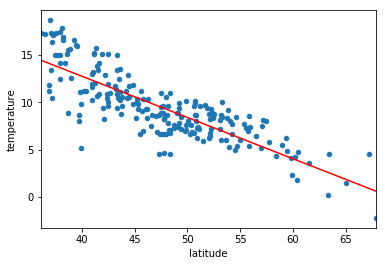

In [30]:
cities.plot.scatter(x='latitude', y='temperature')
a,b = np.polyfit(cities.latitude, cities.temperature, 1) # Regression line is y = ax + b
x1 = min(cities.latitude)
x2 = max(cities.latitude)
plt.plot([x1,x2], [a*x1 + b, a*x2 + b], color='red')
plt.xlim(x1,x2)
plt.show()

Here, we see that temperature appears to be <b>negatively correlated</b> with latitude. 

### Correlation coefficients (r values)
Recall that the value of <b>r</b> is between -1 and 1. 
- 1: maximum positive correlation 
- 0: no correlation
- -1: maximum negative correlation

In order to get the correlation coefficient of the linear regression model, we can use Numpy's <b>corrcoef()</b> function. 

In [31]:
cc = np.corrcoef(cities.latitude, cities.temperature)[1,0]
print('Correlation coefficient for temperature versus latitude:', cc)
cc = np.corrcoef(cities.longitude, cities.temperature)[1,0]
print('Correlation coefficient for temperature versus longitude:', cc)

Correlation coefficient for temperature versus latitude: -0.824104632027
Correlation coefficient for temperature versus longitude: -0.169307504036


Thus, we confirm that temperature is <b>negatively correlated</b> to latitude as its correlation coeffiticent is closer to -1. 

Meanwhile, temperature does not seem to be correlated with longitude. 

### Linear regression for interactive temperature predictor
We'll now compute latitude-temperature regression from cities in Norway, France, and Turkey.

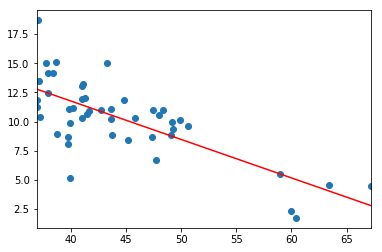

Enter city name (or "quit" to quit): Barcelona
Predicted temperature: 11.3035796886
Actual temperature: 15.78
Enter city name (or "quit" to quit): Cambridge
Predicted temperature: 7.73798513459
Actual temperature: 9.25
Enter city name (or "quit" to quit): quit


In [32]:
train = cities[(cities.country=='Norway') | (cities.country=='France') | (cities.country=='Turkey')]
# Compute and show regression
plt.scatter(train.latitude, train.temperature)
a,b = np.polyfit(train.latitude, train.temperature, 1)
x1 = min(train.latitude)
x2 = max(train.latitude)
plt.plot([x1,x2], [a*x1 + b, a*x2 + b], color='red')
plt.xlim(x1,x2)
plt.show()
# Loop asking user for city name, compute predicted + actual temperature
while True:
    name = input('Enter city name (or "quit" to quit): ')
    if name == 'quit': break
    city = cities[cities.city == name]
    if len(city) == 0:
        print('City not in dataset')
    else:
        # Use float() to convert dataframe element to value
        print('Predicted temperature:', a * float(city.latitude) + b)
        print('Actual temperature:', float(city.temperature))

### <font color="green">Your Turn: World Cup Data</font>

In [33]:
# Read Players.csv into dataframe
f = open('datasets/Players.csv','r')
players = pd.read_csv(f)

Q1: From the players data, compute and plot a linear regression for passes made (y-axis) versus minutes played (x-axis).
Reminder: copy-paste-modify approach to programming!

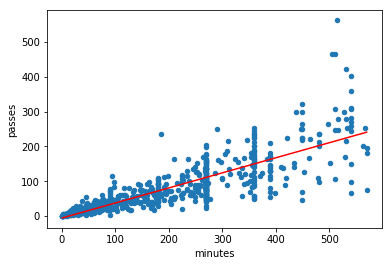

In [34]:
players.plot.scatter(x='minutes', y='passes')
a,b = np.polyfit(players.minutes, players.passes, 1) # Regression line is y = ax + b
x1 = min(players.minutes)
x2 = max(players.minutes)
plt.plot([x1,x2], [a*x1 + b, a*x2 + b], color='red')
plt.show()

Q2: Show the correlation coefficient for the passes-minutes regression. Also show correlation coefficients for tackles versus minutes, shots versus minutes, and saves versus minutes.

In [35]:
cc = np.corrcoef(players.minutes, players.passes)[1,0]
print('Correlation coefficient for passes versus minutes:', cc)
cc = np.corrcoef(players.tackles, players.minutes)[1,0]
print('Correlation coefficient for tackles versus minutes:', cc)
cc = np.corrcoef(players.shots, players.minutes)[1,0]
print('Correlation coefficient for shots versus minutes:', cc)
cc = np.corrcoef(players.saves, players.minutes)[1,0]
print('Correlation coefficient for saves versus minutes:', cc)

Correlation coefficient for passes versus minutes: 0.815119315795
Correlation coefficient for tackles versus minutes: 0.610673461384
Correlation coefficient for shots versus minutes: 0.407923077405
Correlation coefficient for saves versus minutes: 0.228477232531


Q3: Use linear regression for an interactive number-of-passes predictor. 

Training data: compute minutes-passes regression for players from Greece, USA, and Portugal

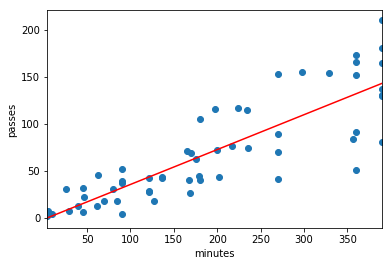

Enter player name (or "quit" to quit): Messi
Predicted passes: 165.134188873
Actual passes: 321.0
Enter player name (or "quit" to quit): Garcia
Predicted passes: 24.9487203662
Actual passes: 24.0
Enter player name (or "quit" to quit): quit


In [36]:
train = players[(players.team=='Greece') | (players.team=='USA') | (players.team=='Portugal')]
# Compute and show regression
plt.scatter(train.minutes, train.passes)
a,b = np.polyfit(train.minutes, train.passes, 1)
x1 = min(train.minutes)
x2 = max(train.minutes)
plt.plot([x1,x2], [a*x1 + b, a*x2 + b], color='red')
plt.xlim(x1,x2)
plt.xlabel("minutes")
plt.ylabel("passes")
plt.show()
# Loop asking user for city name, compute predicted + actual temperature
while True:
    name = input('Enter player name (or "quit" to quit): ')
    if name == 'quit': break
    player = players[players.surname == name]
    if len(player) == 0:
        print('Player not in dataset')
    else:
        # Use float() to convert dataframe element to value
        print('Predicted passes:', a * float(player.minutes) + b)
        print('Actual passes:', float(player.passes))

<b>SUPER BONUS!!</b> Repeat the previous exercise but use separate predictor for the four different positions (goalkeeper,defender,midfielder,forward). 

Does it do better? Try comparing correlation coefficients against one regression for all players. 

Note: To extract a string value from a dataframe element use df.iloc[0].element, e.g., if "player" is a one-row dataframe, then player.iloc[0].position returns the player's position as a string

In [37]:
def regression(position):
    train = players[((players.team=='Greece') | (players.team=='USA') | (players.team=='Portugal')) & (players.position == position)]
    # Compute and show regression
    plt.scatter(train.minutes, train.passes)
    a,b = np.polyfit(train.minutes, train.passes, 1)
    x1 = min(train.minutes)
    x2 = max(train.minutes)
    plt.xlabel("minutes")
    plt.ylabel("passes")
    plt.plot([x1,x2], [a*x1 + b, a*x2 + b], color='red')
    plt.xlim(x1,x2)
    plt.show()
    cc = np.corrcoef(train.minutes, train.passes)[1,0]
    return a, b, cc

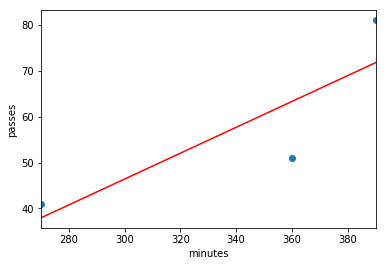

Correlation coefficient for passes vs minutes for goalkeeper position: 0.846153846154


In [38]:
a, b, corrcoef = regression('goalkeeper')
print("Correlation coefficient for passes vs minutes for goalkeeper position:", corrcoef)

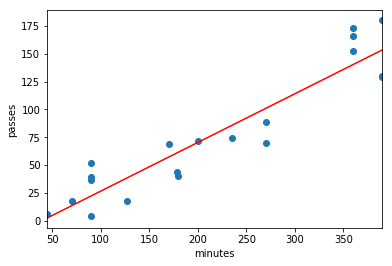

Correlation coefficient for passes vs minutes for defender position: 0.933741115644


In [39]:
a, b, corrcoef = regression('defender')
print("Correlation coefficient for passes vs minutes for defender position:", corrcoef)

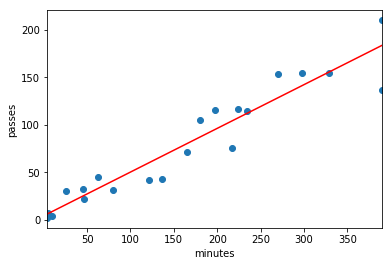

Correlation coefficient for passes vs minutes for midfielder position: 0.952119459967


In [40]:
a, b, corrcoef = regression('midfielder')
print("Correlation coefficient for passes vs minutes for midfielder position:", corrcoef)

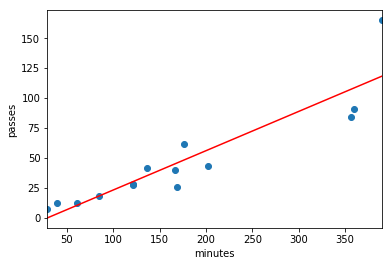

Correlation coefficient for passes vs minutes for forward position: 0.911153057074


In [41]:
a, b, corrcoef = regression('forward')
print("Correlation coefficient for passes vs minutes for forward position:", corrcoef)

Enter player name (or "quit" to quit): Messi


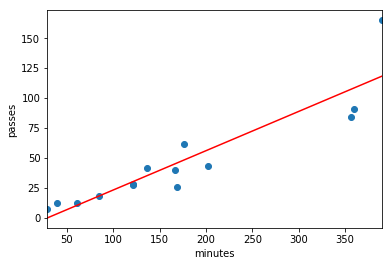

Player name:  Messi
Position:  forward
Minutes played 450.0
Predicted passes: 138.069249297
Actual passes: 321.0
Enter player name (or "quit" to quit): Garcia


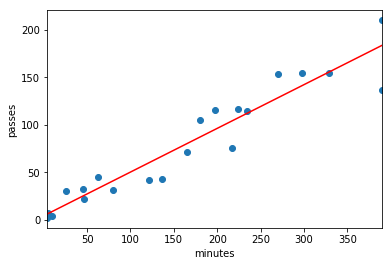

Player name:  Garcia
Position:  midfielder
Minutes played 72.0
Predicted passes: 37.3599809504
Actual passes: 24.0
Enter player name (or "quit" to quit): quit


In [42]:
while True:
    name = input('Enter player name (or "quit" to quit): ')
    if name == 'quit': break
    player = players[players.surname == name]
    if len(player) == 0:
        print('Player not in dataset')
    else:
        # Use float() to convert dataframe element to value
        positions = ['goalkeeper', 'defender', 'midfielder', 'forward']
        for position in positions:
            if player.iloc[0].position == position:
                a, b, cc = regression(position)
        print('Player name: ', player.iloc[0].surname)
        print('Position: ', player.iloc[0].position)
        print('Minutes played', float(player.minutes))
        print('Predicted passes:', a * float(player.minutes) + b)
        print('Actual passes:', float(player.passes))